# **Data Understanding**

> **🎯 Latar Belakang:**

> Dalam industri perbankan, memahami perilaku nasabah sangat krusial untuk meningkatkan efektivitas kampanye pemasaran. Salah satu tantangan terbesar adalah mengetahui siapa saja yang berpotensi merespons positif terhadap penawaran produk keuangan tertentu, seperti deposito berjangka. Dengan memanfaatkan data historis yang mencakup informasi demografis nasabah, riwayat interaksi, serta hasil kampanye sebelumnya, peserta diharapkan dapat membangun model klasifikasi yang mampu memprediksi secara akurat kemungkinan seorang nasabah untuk membeli produk deposito.

> **🛠 Tujuan:**

> Membuat model machine learning yang dapat mengklasifikasikan nasabah ke dalam dua kategori:


*   1: nasabah diprediksi akan membeli deposito berjangka
*   0: nasabah diprediksi tidak akan membeli



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
!pip install catboost lightgbm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 4.8 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Pemanggilan dataset
data=pd.read_csv('/content/drive/MyDrive/Dataset/training_dataset.csv')
data

,customer_number,usia,pekerjaan,status_perkawinan,pendidikan,gagal_bayar_sebelumnya,pinjaman_rumah,pinjaman_pribadi,jenis_kontak,bulan_kontak_terakhir,...,hari_sejak_kontak_sebelumnya,jumlah_kontak_sebelumnya,hasil_kampanye_sebelumnya,tingkat_variasi_pekerjaan,indeks_harga_konsumen,indeks_kepercayaan_konsumen,suku_bunga_euribor_3bln,jumlah_pekerja,pulau,berlangganan_deposito
0,531036,63,sosial media specialis,menikah,Pendidikan Tinggi,no,yes,no,cellular,jul,...,999,0,nonexistent,-1.7,94.215,-40.3,0.885,4991.6,Papua,1
1,999241,43,teknisi,menikah,Pendidikan Tinggi,no,yes,no,cellular,nov,...,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,Sulawesi,0
2,995002,29,sosial media specialis,lajang,Pendidikan Tinggi,no,yes,yes,cellular,jul,...,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,Papua,0
3,932750,40,pekerja kasar,menikah,SMA,no,no,no,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,Sumatera,1
4,684699,40,sosial media specialis,lajang,Pendidikan Tinggi,no,no,no,cellular,aug,...,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,Bali,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22911,680377,32,teknisi,menikah,Diploma,no,yes,no,cellular,aug,...,999,0,nonexistent,1.4,93.444,-36.1,4.967,5228.1,Kalimantan,0
22912,505429,30,mahasiswa,lajang,Diploma,no,no,no,telephone,sep,...,999,0,nonexistent,-1.1,94.199,-37.5,0.880,4963.6,Bali,0
22913,308952,29,manajer,lajang,SMA,no,yes,no,cellular,jul,...,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,NTT,0
22914,865813,52,entrepreneur,menikah,Tidak Tamat SD,unknown,yes,no,telephone,jun,...,999,0,nonexistent,1.4,94.465,-41.8,4.960,5228.1,NTB,0


In [ ]:
# Memuat informasi dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22916 entries, 0 to 22915
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_number               22916 non-null  int64  
 1   usia                          22916 non-null  int64  
 2   pekerjaan                     22916 non-null  object 
 3   status_perkawinan             22916 non-null  object 
 4   pendidikan                    22916 non-null  object 
 5   gagal_bayar_sebelumnya        22916 non-null  object 
 6   pinjaman_rumah                22916 non-null  object 
 7   pinjaman_pribadi              22916 non-null  object 
 8   jenis_kontak                  22916 non-null  object 
 9   bulan_kontak_terakhir         22916 non-null  object 
 10  hari_kontak_terakhir          22916 non-null  object 
 11  jumlah_kontak_kampanye_ini    22916 non-null  int64  
 12  hari_sejak_kontak_sebelumnya  22916 non-null  int64  
 13  j

# Data Preparation

In [ ]:
# Mengecek data missing value
data.isnull().sum()

,0
customer_number,0
usia,0
pekerjaan,0
status_perkawinan,0
pendidikan,0
gagal_bayar_sebelumnya,0
pinjaman_rumah,0
pinjaman_pribadi,0
jenis_kontak,0
bulan_kontak_terakhir,0


In [ ]:
# Mengecek data duplikat
data.duplicated().sum()

np.int64(0)

In [ ]:
# Mengecek jumlah berlangganan deposit dan tidak berlangganan
nilai_deposito=data['berlangganan_deposito'].value_counts()
nilai_deposito

,count
berlangganan_deposito,
0,20302
1,2614


In [ ]:
# Mengecek nilai uniq pada kolom status perkawinan
status_pernikahan=data['status_perkawinan'].unique()
status_pernikahan

array(['menikah', 'lajang', 'cerai', 'unknown'], dtype=object)

In [ ]:
# Mengecek nilai uniq pada kolom pekerjaan
pekerjaan=data['pekerjaan'].unique()
pekerjaan

array(['sosial media specialis', 'teknisi', 'pekerja kasar', 'manajer',
       'asisten rumah tangga', 'mahasiswa', 'penyedia jasa',
       'pemilik bisnis', 'entrepreneur', 'pengangguran', 'pensiunan',
       'unknown'], dtype=object)

In [ ]:
# Mengecek nilai uniq pada kolom pendidikan
pendidikan=data['pendidikan'].unique()
pendidikan

array(['Pendidikan Tinggi', 'SMA', 'Tidak Tamat SD', 'SMP', 'Diploma',
       'SD', 'unknown', 'TIDAK SEKOLAH'], dtype=object)

In [ ]:
#mengecek nilai unik pada kolom bulan_kontak_terakhir
bulan_kontak_terakhir=data['bulan_kontak_terakhir'].unique()
bulan_kontak_terakhir

array(['jul', 'nov', 'may', 'aug', 'oct', 'apr', 'jun', 'sep', 'mar',
       'dec'], dtype=object)

In [ ]:
#mengecek nilai unik pada kolom hari_kontak terakhir
hari_kontak_terakhir=data['hari_kontak_terakhir'].unique()
hari_kontak_terakhir

array(['fri', 'thu', 'wed', 'tue', 'mon'], dtype=object)

In [ ]:
# Mengecek Outlier

# fitur-fitur yang dipertimbangkan untuk penanganan outlier
list_numerik_features = ['hari_sejak_kontak_sebelumnya', 'tingkat_variasi_pekerjaan', 'indeks_harga_konsumen', 'indeks_kepercayaan_konsumen', 'suku_bunga_euribor_3bln']


In [ ]:
# Menjumlahkan yang terindikasi outliers
Q1 = data[list_numerik_features].quantile(0.25)
Q3 = data[list_numerik_features].quantile(0.75)
IQR = Q3 - Q1
outliers_count_specified = ((data[list_numerik_features] < (Q1 - 1.5 * IQR)) | (data[list_numerik_features] > (Q3 + 1.5 * IQR))).sum()
outliers_count_specified

,0
hari_sejak_kontak_sebelumnya,849
tingkat_variasi_pekerjaan,0
indeks_harga_konsumen,0
indeks_kepercayaan_konsumen,258
suku_bunga_euribor_3bln,0


# Exploratory Data Analysis ( EDA )

## Distribusi jumlah berlangganan deposit dan tidak berlangganan

<Axes: ylabel='count'>

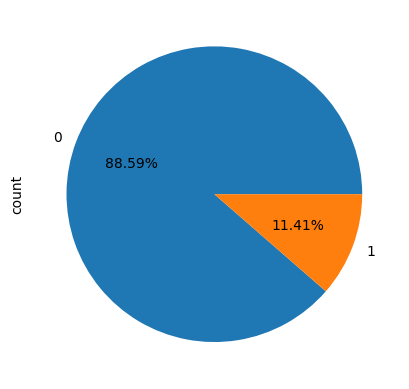

In [ ]:
# Distribusi jumlah berlangganan deposit dan tidak berlangganan
data['berlangganan_deposito'].value_counts().plot.pie(autopct='%.2f%%')

## Distribusi Berdasarkan Usia

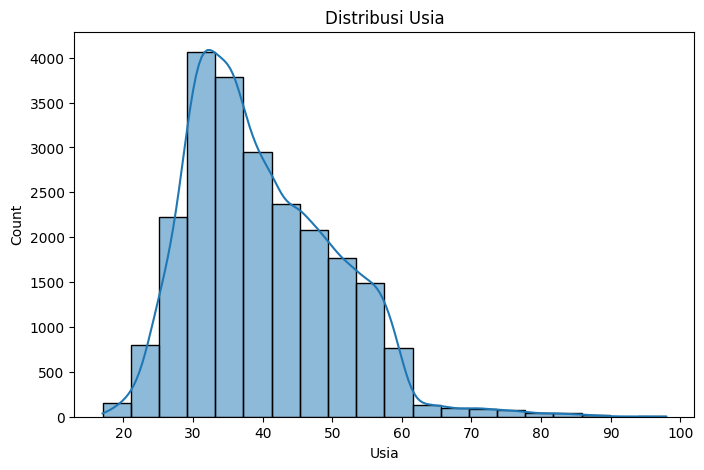

In [ ]:
# Distribusi Berdasarkan Usia
plt.figure(figsize=(8, 5))
sns.histplot(data['usia'], kde=True, bins=20)
plt.title('Distribusi Usia')
plt.xlabel('Usia')
plt.show()

## Distribusi Berdasarkan Status Perkawinan

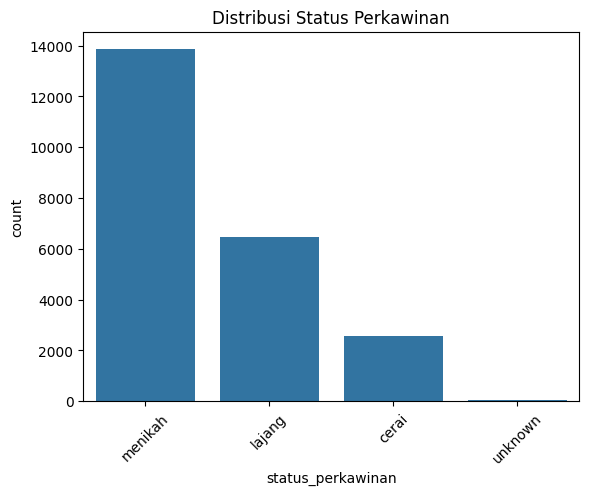

In [ ]:
# Distribusi Berdasarkan Status perkawinan

sns.countplot(data=data, x='status_perkawinan')
plt.title('Distribusi Status Perkawinan')
plt.xticks(rotation=45)
plt.show()

## Distribusi Berdasarkan Pendidikan

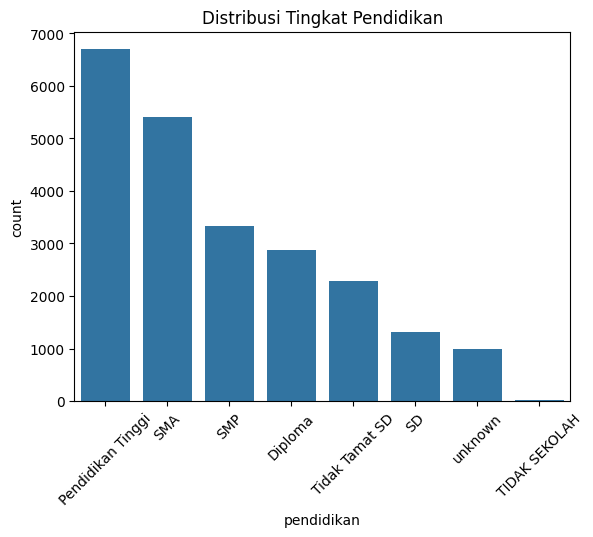

In [ ]:
# Distribusi Berdasarkan Pendidikan

sns.countplot(data=data, x='pendidikan', order=data['pendidikan'].value_counts().index)
plt.title('Distribusi Tingkat Pendidikan')
plt.xticks(rotation=45)
plt.show()

## Distribusi Berdasarkan Pulau

<ipython-input-19-880ba849b6ce>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=pulau_counts.index, x=pulau_counts.values, palette='viridis')


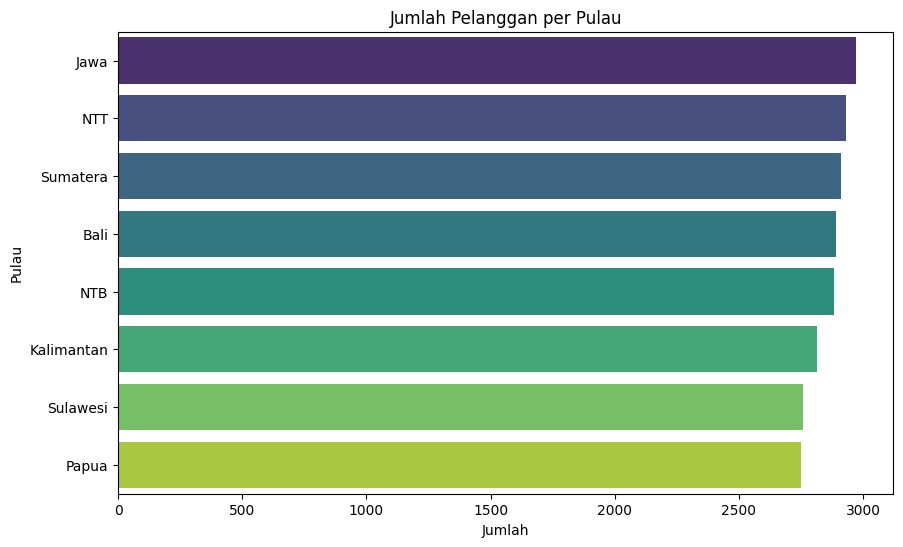

In [ ]:
# Distribusi berdasarkan pulau

# Jumlah pelanggan per pulau
pulau_counts = data['pulau'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(y=pulau_counts.index, x=pulau_counts.values, palette='viridis')
plt.title('Jumlah Pelanggan per Pulau')
plt.xlabel('Jumlah')
plt.ylabel('Pulau')
plt.show()

## Distribusi Pekerjaan Pelanggan

<ipython-input-20-9fd1ab08f161>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=pulau_counts.index, x=pulau_counts.values, palette='viridis')


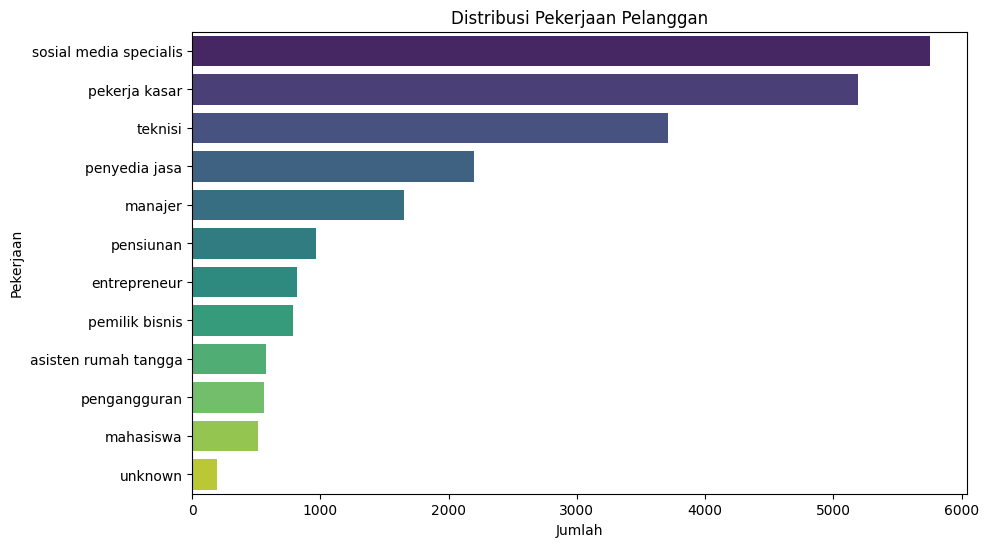

In [ ]:
# Distribusi pekerjaan pelanggan

pulau_counts = data['pekerjaan'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(y=pulau_counts.index, x=pulau_counts.values, palette='viridis')
plt.title('Distribusi Pekerjaan Pelanggan')
plt.xlabel('Jumlah')
plt.ylabel('Pekerjaan')
plt.show()

## Distribusi Berdasarkan Bulan

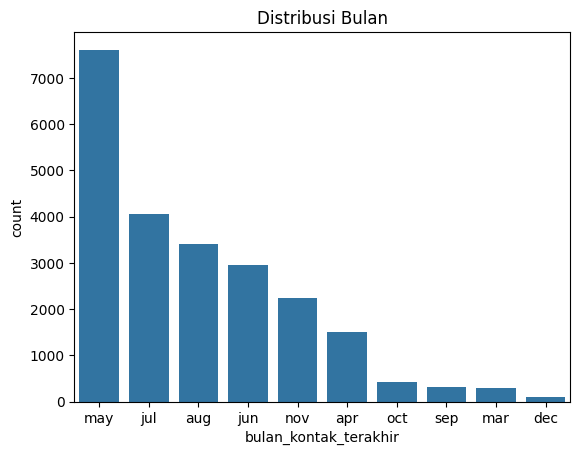

In [ ]:
# Distribusi Bulan
sns.countplot(data=data, x='bulan_kontak_terakhir', order=data['bulan_kontak_terakhir'].value_counts().index)
plt.title('Distribusi Bulan')
plt.show()

## Distrbusi Jenis Kontak

<ipython-input-22-65225063d489>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=jenis_kontak.index, y=jenis_kontak.values, palette='viridis')


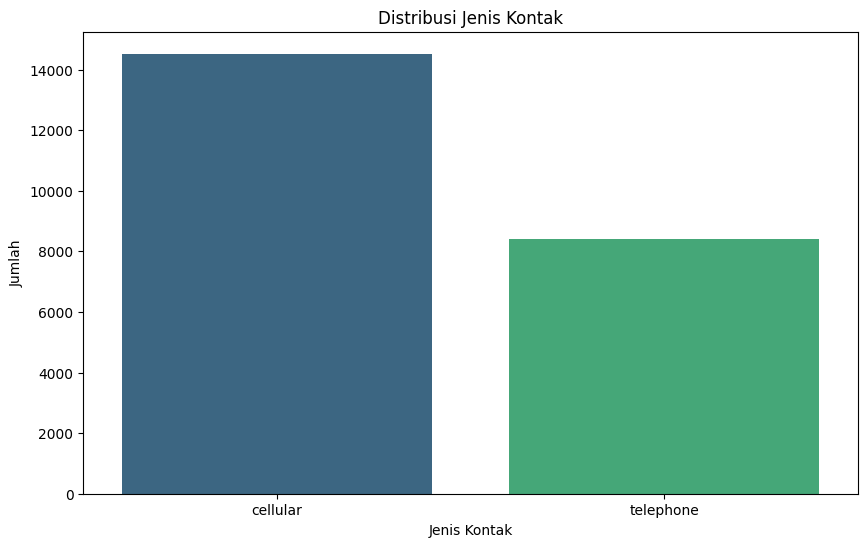

In [ ]:
#Distribusi jenis kontak
jenis_kontak = data['jenis_kontak'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=jenis_kontak.index, y=jenis_kontak.values, palette='viridis')
plt.title('Distribusi Jenis Kontak')
plt.ylabel('Jumlah')
plt.xlabel('Jenis Kontak')
plt.show()


## Distribusi Pinjaman Rumah

<ipython-input-23-ae7988c03d76>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pinjaman_rumah.index, y=pinjaman_rumah.values, palette='viridis')


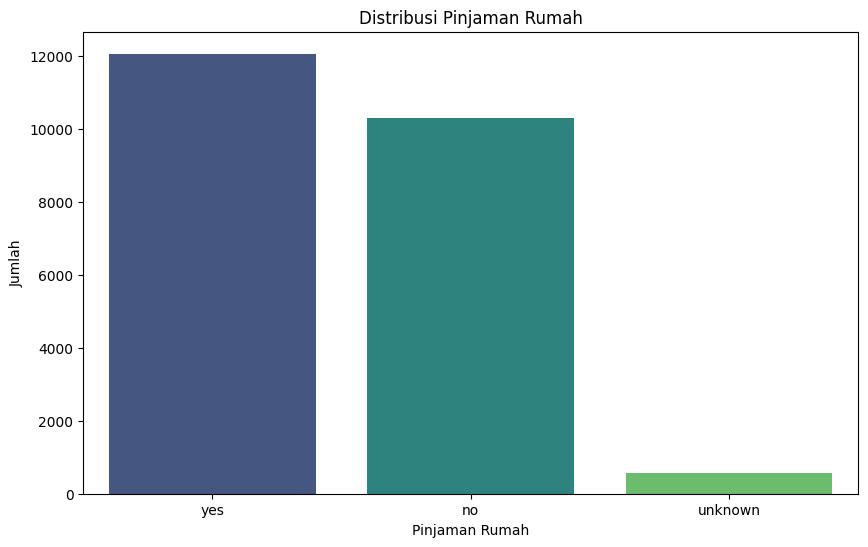

In [ ]:
#Distribusi Pinjaman Rumah
pinjaman_rumah = data['pinjaman_rumah'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=pinjaman_rumah.index, y=pinjaman_rumah.values, palette='viridis')
plt.title('Distribusi Pinjaman Rumah')
plt.ylabel('Jumlah')
plt.xlabel('Pinjaman Rumah')
plt.show()

## Distribusi Pinjaman Pribadi

<ipython-input-24-966ffd66b97e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pinjaman_pribadi.index, y=pinjaman_pribadi.values, palette='viridis')


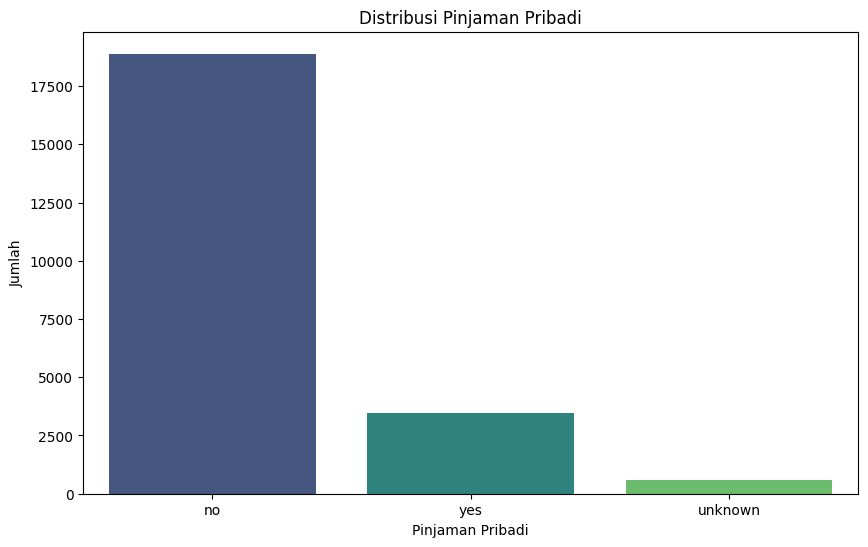

In [ ]:
#distribusi pinjaman pribadi
pinjaman_pribadi = data['pinjaman_pribadi'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=pinjaman_pribadi.index, y=pinjaman_pribadi.values, palette='viridis')
plt.title('Distribusi Pinjaman Pribadi')
plt.ylabel('Jumlah')
plt.xlabel('Pinjaman Pribadi')
plt.show()

## Status Perkawinan Berdasarkan Pinjaman Rumah

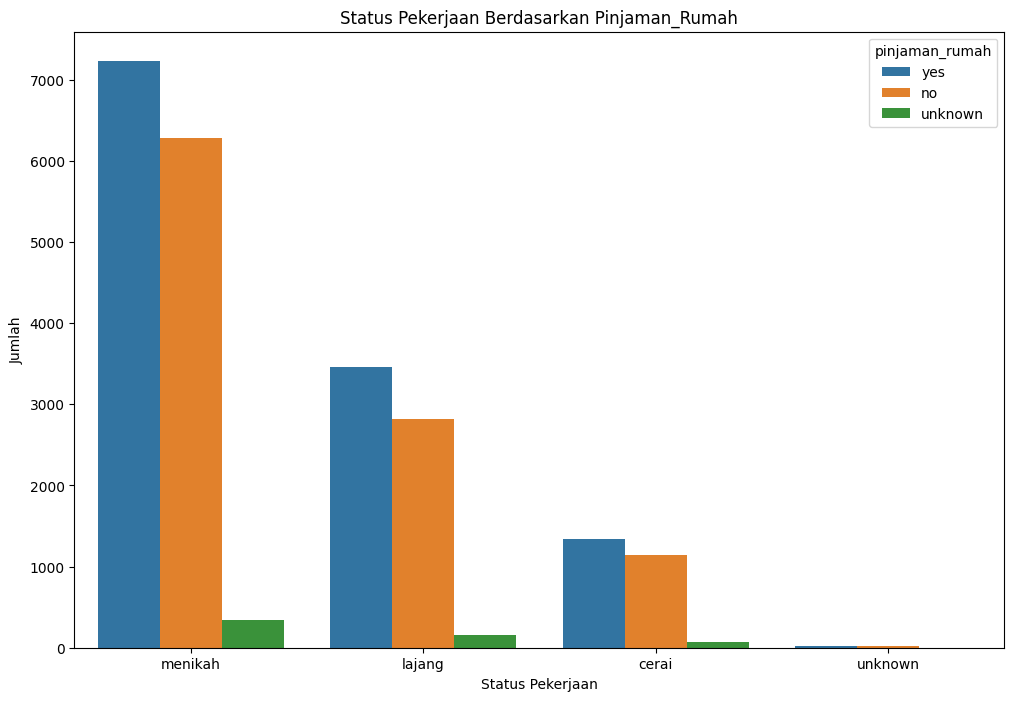

In [ ]:
#Status Perkawinan Berdasarkan Pinjaman_rumah
plt.figure(figsize=(12, 8))
sns.countplot(x='status_perkawinan', hue='pinjaman_rumah', data=data)
plt.title('Status Pekerjaan Berdasarkan Pinjaman_Rumah')
plt.xlabel('Status Pekerjaan')
plt.ylabel('Jumlah')
plt.show()

## Status Perkawinan Berdasarkan Pinjaman Pribadi

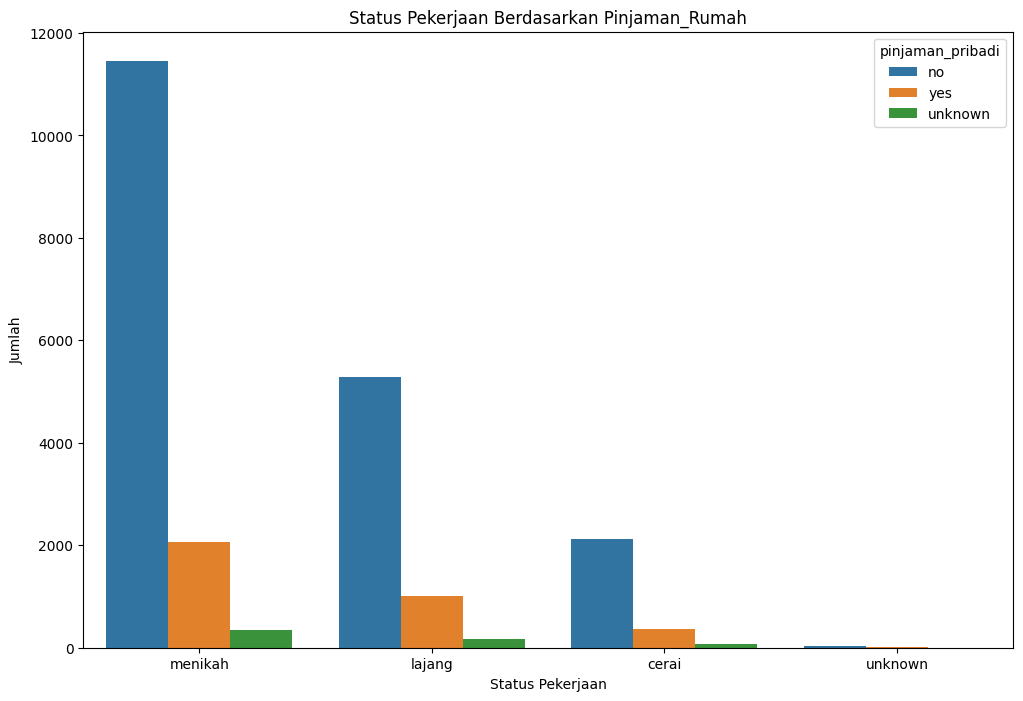

In [ ]:
#Status Perkawinan berdasaran pinjaman pribadi
plt.figure(figsize=(12, 8))
sns.countplot(x='status_perkawinan', hue='pinjaman_pribadi', data=data)
plt.title('Status Pekerjaan Berdasarkan Pinjaman_Rumah')
plt.xlabel('Status Pekerjaan')
plt.ylabel('Jumlah')
plt.show()

## Status Pekerjaan Berdasarkan Pinjaman Rumah

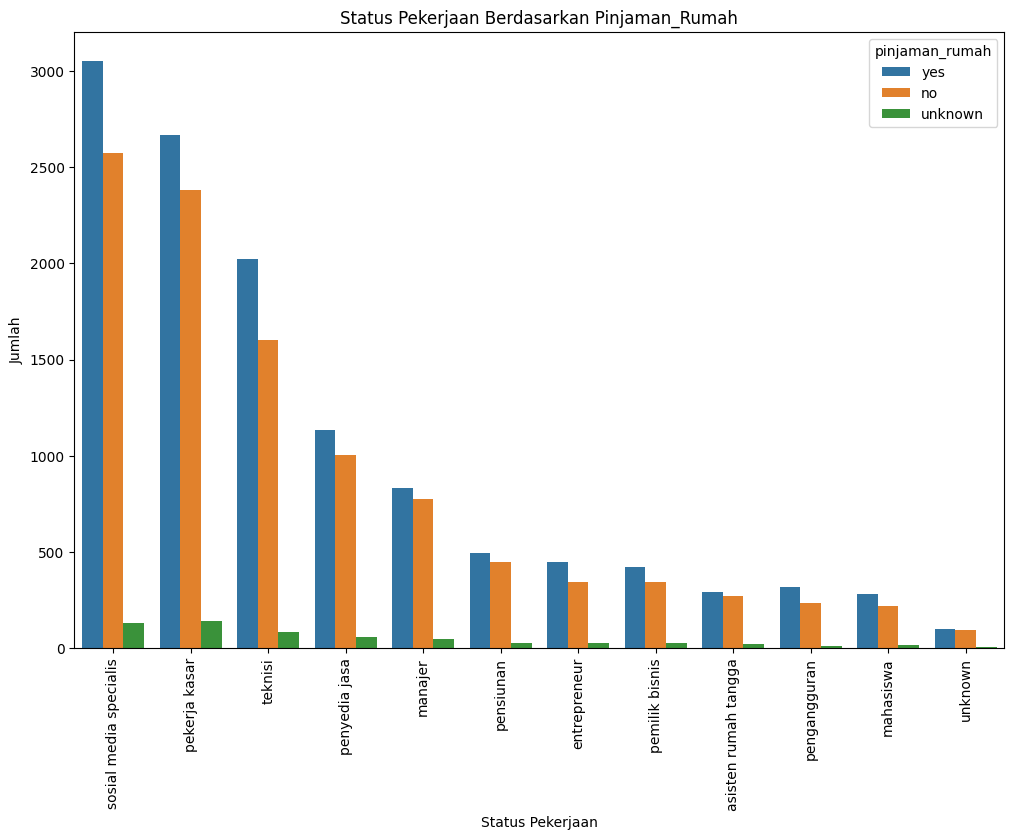

In [ ]:
# Status Pekerjaan Berdasarkan Pinjaman_rumah
plt.figure(figsize=(12, 8))
pekerjaan_counts = data['pekerjaan'].value_counts().sort_values(ascending=False)
sns.countplot(x='pekerjaan', hue='pinjaman_rumah', data=data, order=pekerjaan_counts.index)
plt.title('Status Pekerjaan Berdasarkan Pinjaman_Rumah')
plt.xlabel('Status Pekerjaan')
plt.ylabel('Jumlah')
plt.xticks(rotation=90)
plt.show()

## Status Pekerjaan Berdasarkan Pinjaman Pribadi

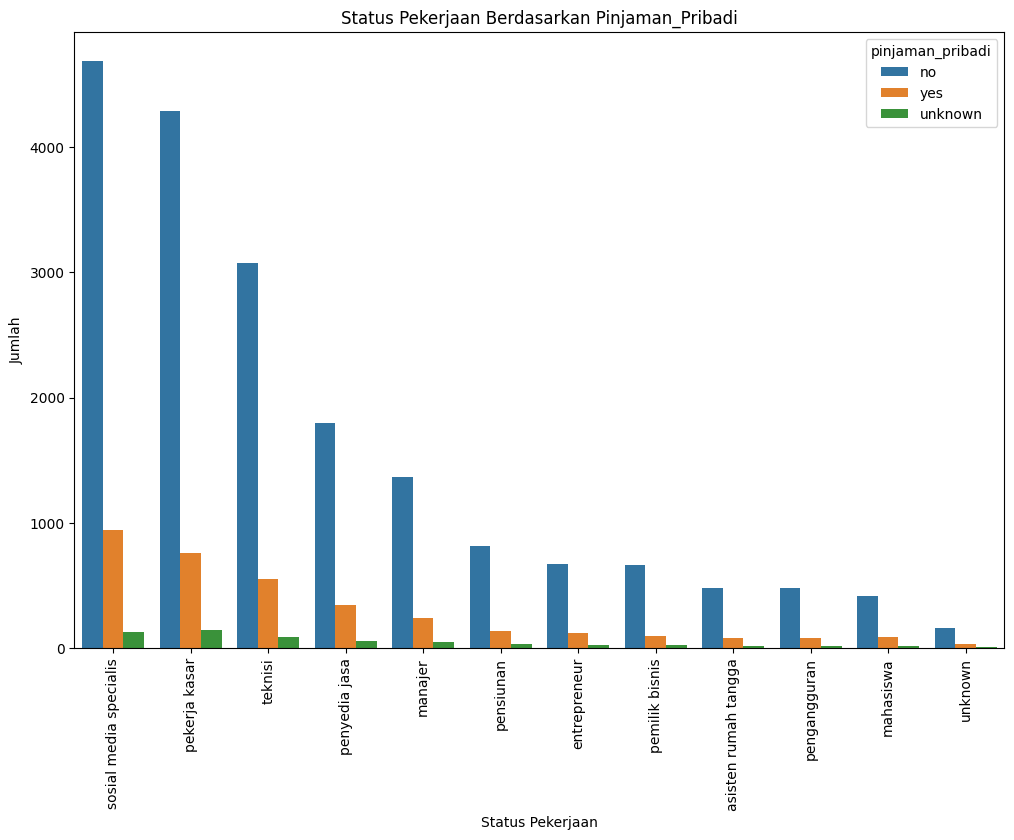

In [ ]:
# Status Pekerjaan Berdasarkan Pinjaman_pribadi
plt.figure(figsize=(12, 8))
pekerjaan_counts = data['pekerjaan'].value_counts().sort_values(ascending=False)
sns.countplot(x='pekerjaan', hue='pinjaman_pribadi', data=data, order=pekerjaan_counts.index)

plt.title('Status Pekerjaan Berdasarkan Pinjaman_Pribadi')
plt.xlabel('Status Pekerjaan')
plt.ylabel('Jumlah')
plt.xticks(rotation=90)
plt.show()

## Distribusi Pulau Berdasarkan Pinjaman Pribadi

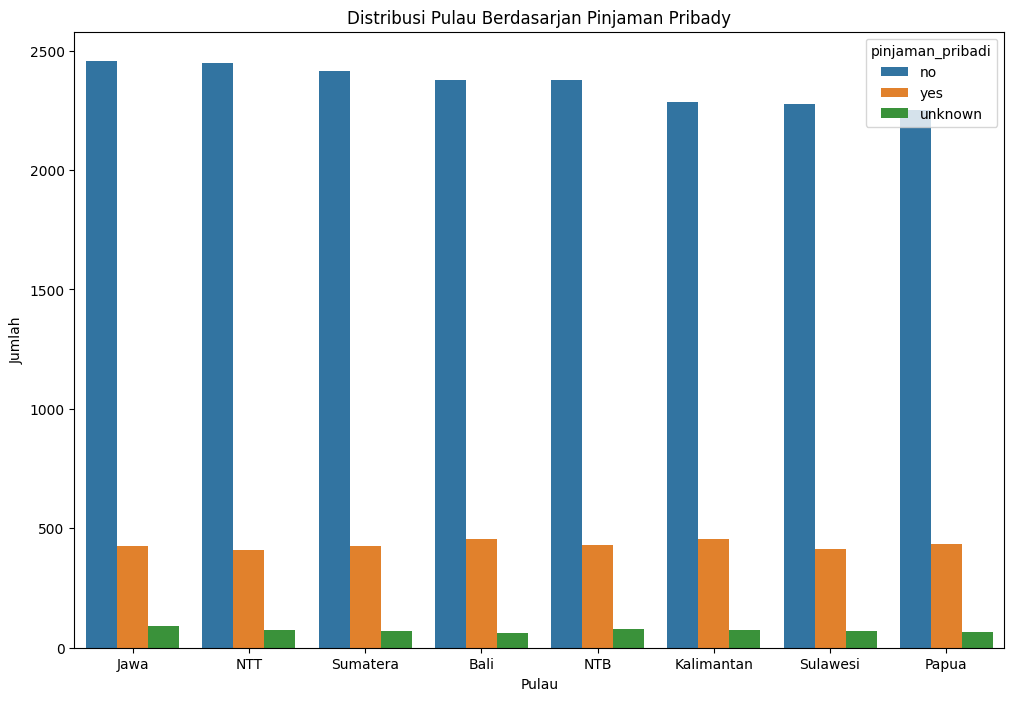

In [ ]:
#Distribusi Pulau Berdasarkan Pinjaman_pribadi
plt.figure(figsize=(12, 8))
pulau_counts = data['pulau'].value_counts().sort_values(ascending=False)
sns.countplot(x='pulau', hue='pinjaman_pribadi', data=data, order=pulau_counts.index)

plt.title('Distribusi Pulau Berdasarjan Pinjaman Pribady')
plt.xlabel('Pulau')
plt.ylabel('Jumlah')
plt.show()

## Distribusi Pulau Berdasarkan Pinjaman Rumah

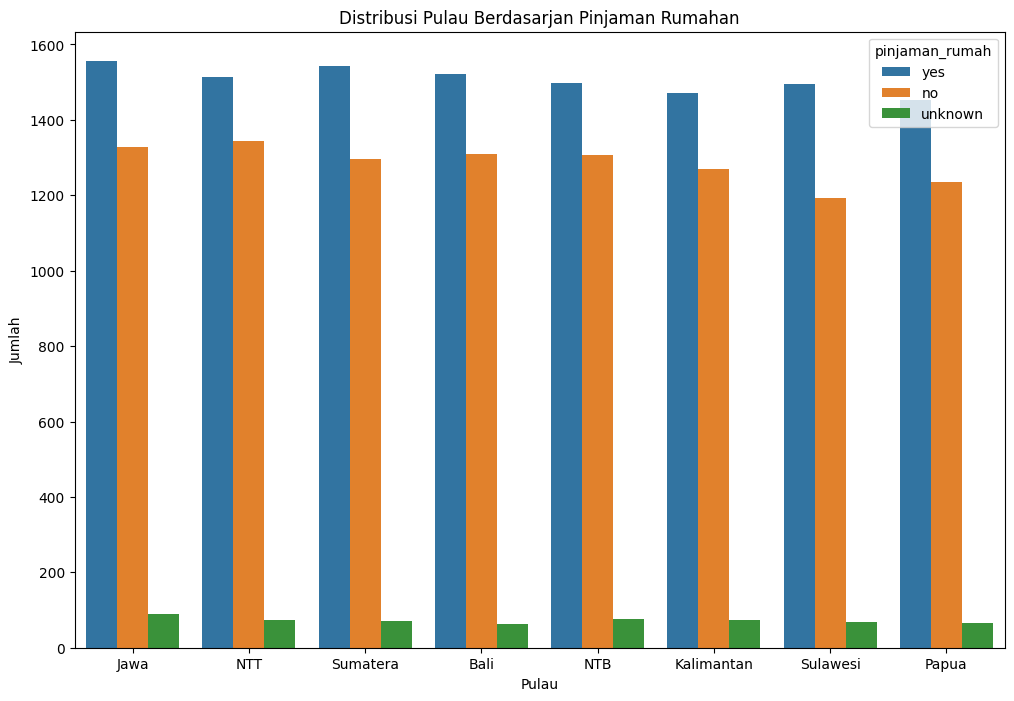

In [ ]:
#Distribusi Pulau Berdasarkan Pinjaman_rumah
plt.figure(figsize=(12, 8))
pulau_counts = data['pulau'].value_counts().sort_values(ascending=False)
sns.countplot(x='pulau', hue='pinjaman_rumah', data=data, order=pulau_counts.index)

plt.title('Distribusi Pulau Berdasarjan Pinjaman Rumahan')
plt.xlabel('Pulau')
plt.ylabel('Jumlah')
plt.show()

## Pekerjaan Berdasarkan Usia

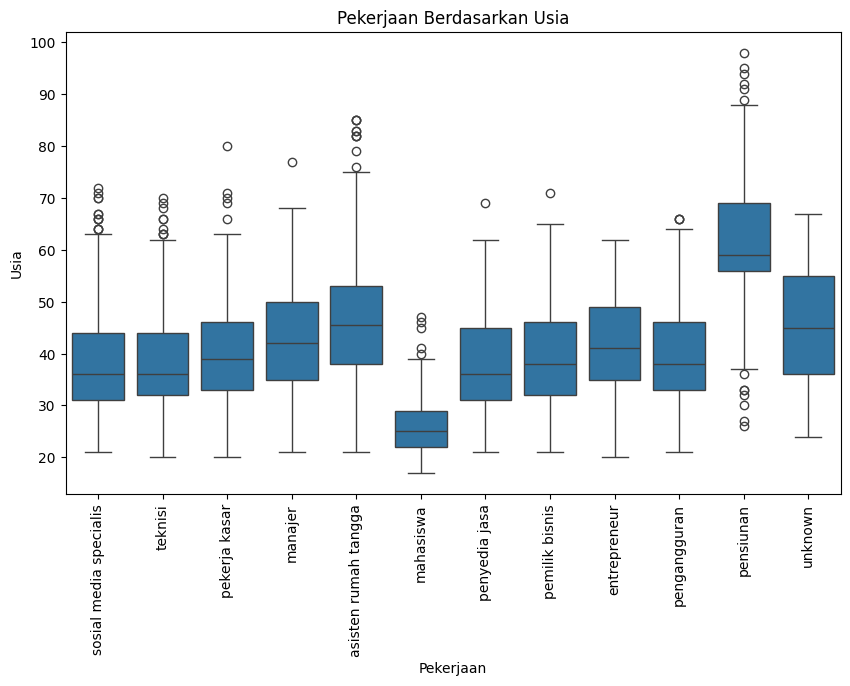

In [ ]:
#Pekerjaan Berdasarkan Usia
plt.figure(figsize=(10, 6))
sns.boxplot(x='pekerjaan', y='usia', data=data)
plt.title('Pekerjaan Berdasarkan Usia')
plt.xlabel('Pekerjaan')
plt.ylabel('Usia')
plt.xticks(rotation=90)
plt.show()

# Feature Engineering

In [ ]:
#merubah nilai di kolom bulan_kontak_terakhir menjadi numerik
bulan_mapping={
    'mar':3,'apr':4,
    'may':5,'jun':6,
    'jul':7,'aug':8,
    'sep':9,'oct':10,
    'nov':11,'dec':12
}
data['bulan_kontak_terakhir']=data['bulan_kontak_terakhir'].map(bulan_mapping)
data['bulan_kontak_terakhir'].unique()

array([ 7, 11,  5,  8, 10,  4,  6,  9,  3, 12])

### merubah nilai yang sebelumnya bulan berupa string dirubah menjadi number:


*   Maret : 3
*   April :4
*   Mei :5
*   Juni: 6
*   Juli: 7
*   Agustus: 8
*   September: 9
*   Oktober: 10
*   November: 11
*   Desember: 12

nilainya dimulai dari 3 dikarenakan bulan januari dan februari tidak terdapat di data train dan ditakutkan di data validasi terdapat bulan januari dan februari maka pada data train ini dimulai dari angka 3



In [ ]:
#merubah nilai di kolom hari menjadi numerik
hari_maping={
    'mon':1,'tue':2,'wed':3,
    'thu':4,'fri':5
}
data['hari_kontak_terakhir']=data['hari_kontak_terakhir'].map(hari_maping)
data['hari_kontak_terakhir'].unique()

array([5, 4, 3, 2, 1])

### merubah nilai yang sebelumnya hari berupa string dirubah menjadi number:


*   Mon : 1
*   tue :2
*   wed :3
*   thu: 4
*   fri: 5

In [ ]:
##merubah nilai di kolom pendidikan menjadi numerik
pendidikan_maping={
    'unknown':1,'TIDAK SEKOLAH':2,'Tidak Tamat SD':3,
    'SD': 4,'SMP':5,'SMA':6, 'Diploma':7,
    'Pendidikan Tinggi':8
}
data['pendidikan']=data['pendidikan'].map(pendidikan_maping)
data['pendidikan'].value_counts()

,count
pendidikan,
8,6699
6,5403
5,3337
7,2881
3,2284
4,1308
1,992
2,12


In [ ]:
data.head()

,customer_number,usia,pekerjaan,status_perkawinan,pendidikan,gagal_bayar_sebelumnya,pinjaman_rumah,pinjaman_pribadi,jenis_kontak,bulan_kontak_terakhir,...,hari_sejak_kontak_sebelumnya,jumlah_kontak_sebelumnya,hasil_kampanye_sebelumnya,tingkat_variasi_pekerjaan,indeks_harga_konsumen,indeks_kepercayaan_konsumen,suku_bunga_euribor_3bln,jumlah_pekerja,pulau,berlangganan_deposito
0,531036,63,sosial media specialis,menikah,8,no,yes,no,cellular,7,...,999,0,nonexistent,-1.7,94.215,-40.3,0.885,4991.6,Papua,1
1,999241,43,teknisi,menikah,8,no,yes,no,cellular,11,...,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,Sulawesi,0
2,995002,29,sosial media specialis,lajang,8,no,yes,yes,cellular,7,...,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,Papua,0
3,932750,40,pekerja kasar,menikah,6,no,no,no,telephone,5,...,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,Sumatera,1
4,684699,40,sosial media specialis,lajang,8,no,no,no,cellular,8,...,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,Bali,0


In [ ]:
#label encoding kolom pekerjaan, status perkawinan, gagal bayar, pinjaman rumah,pinjaman pribadi,hasil kampanye dalam satu kali
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['pekerjaan']=le.fit_transform(data['pekerjaan'])
data['status_perkawinan']=le.fit_transform(data['status_perkawinan'])
data['gagal_bayar_sebelumnya']=le.fit_transform(data['gagal_bayar_sebelumnya'])
data['pinjaman_rumah']=le.fit_transform(data['pinjaman_rumah'])
data['pinjaman_pribadi']=le.fit_transform(data['pinjaman_pribadi'])
data['hasil_kampanye_sebelumnya']=le.fit_transform(data['hasil_kampanye_sebelumnya'])
data['pulau']=le.fit_transform(data['pulau'])
data['jenis_kontak']=le.fit_transform(data['jenis_kontak'])
data.head()

,customer_number,usia,pekerjaan,status_perkawinan,pendidikan,gagal_bayar_sebelumnya,pinjaman_rumah,pinjaman_pribadi,jenis_kontak,bulan_kontak_terakhir,...,hari_sejak_kontak_sebelumnya,jumlah_kontak_sebelumnya,hasil_kampanye_sebelumnya,tingkat_variasi_pekerjaan,indeks_harga_konsumen,indeks_kepercayaan_konsumen,suku_bunga_euribor_3bln,jumlah_pekerja,pulau,berlangganan_deposito
0,531036,63,9,2,8,0,2,0,0,7,...,999,0,1,-1.7,94.215,-40.3,0.885,4991.6,5,1
1,999241,43,10,2,8,0,2,0,0,11,...,999,0,1,-0.1,93.200,-42.0,4.021,5195.8,6,0
2,995002,29,9,1,8,0,2,2,0,7,...,999,0,1,1.4,93.918,-42.7,4.958,5228.1,5,0
3,932750,40,4,2,6,0,0,0,1,5,...,999,0,1,1.1,93.994,-36.4,4.859,5191.0,7,1
4,684699,40,9,1,8,0,0,0,0,8,...,999,0,1,1.4,93.444,-36.1,4.964,5228.1,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22916 entries, 0 to 22915
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_number               22916 non-null  int64  
 1   usia                          22916 non-null  int64  
 2   pekerjaan                     22916 non-null  int64  
 3   status_perkawinan             22916 non-null  int64  
 4   pendidikan                    22916 non-null  int64  
 5   gagal_bayar_sebelumnya        22916 non-null  int64  
 6   pinjaman_rumah                22916 non-null  int64  
 7   pinjaman_pribadi              22916 non-null  int64  
 8   jenis_kontak                  22916 non-null  int64  
 9   bulan_kontak_terakhir         22916 non-null  int64  
 10  hari_kontak_terakhir          22916 non-null  int64  
 11  jumlah_kontak_kampanye_ini    22916 non-null  int64  
 12  hari_sejak_kontak_sebelumnya  22916 non-null  int64  
 13  j

## Heatmap Correlation

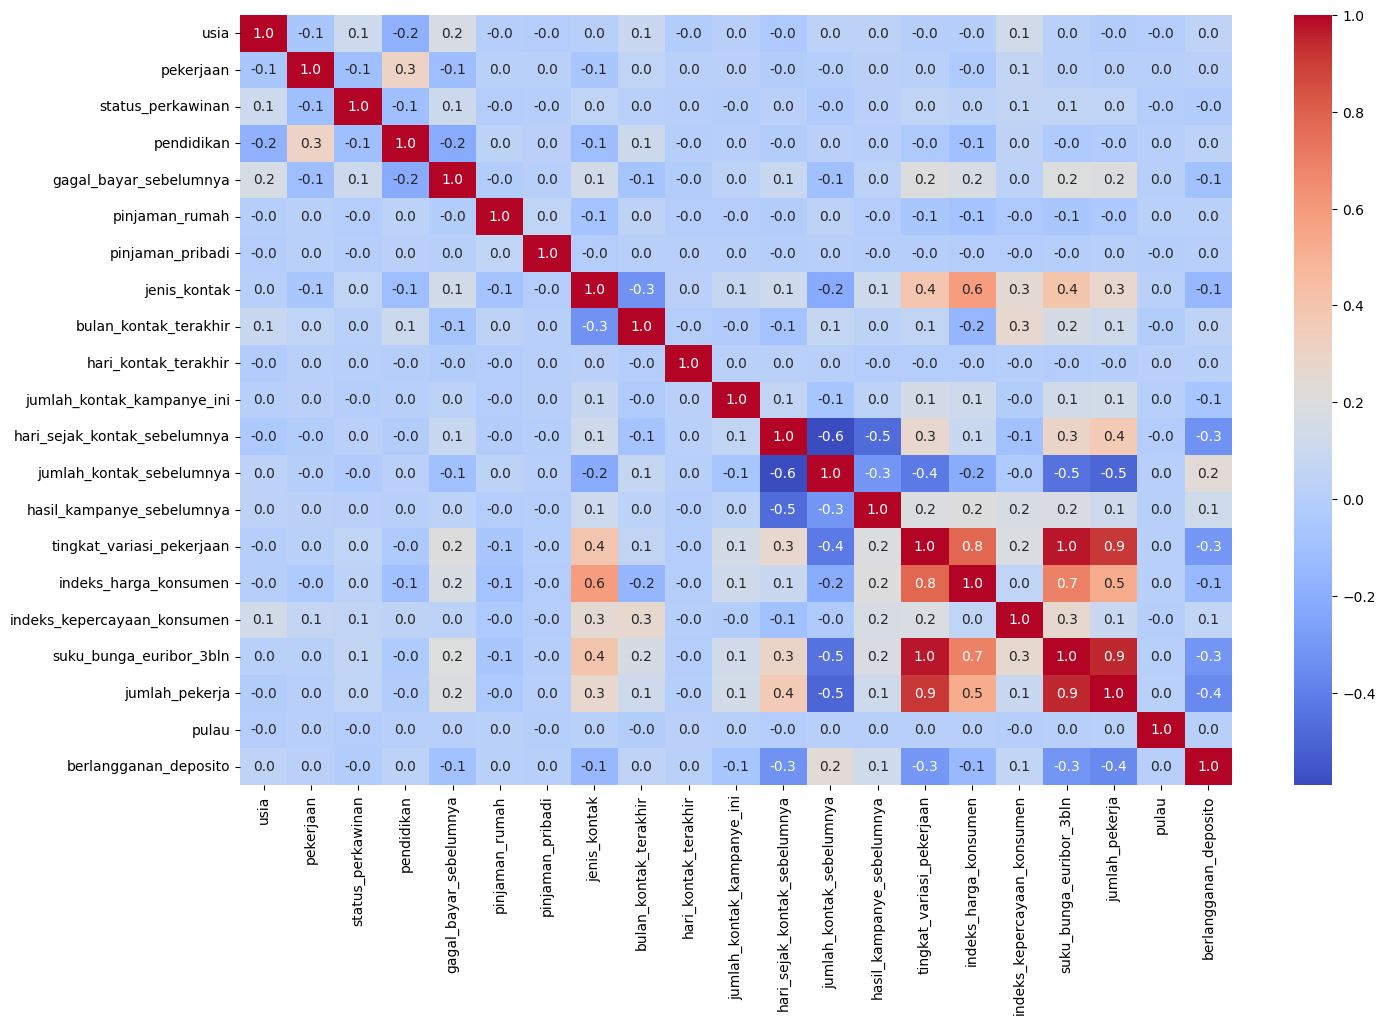

In [ ]:
data_corr=data.drop(columns=['customer_number'])
data_corr.corr()
#visualisasi heatmap
plt.figure(figsize=(16,10))
sns.heatmap(data_corr.corr(),annot=True,cmap='coolwarm',fmt='.1f')
plt.show()

# Feature Selection

In [ ]:
# Memisahkan target dan fitur
X = data.drop(columns=['berlangganan_deposito'])
y = data['berlangganan_deposito']

print(f'Data fitur : {X.shape}')
print(f'Data target : {y.shape}')

Data fitur : (22916, 21)
Data target : (22916,)


## Feature Selection Menggunakan Korelasi Pearson ( Numerik )

# Imbalanced Data

### Split data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Menampilkan jumlah data training dan data testing
print('Banyaknya X_train : ', len(X_train))
print('Banyaknya X_test : ', len(X_test))
print('Banyaknya y_train : ', len(y_train))
print('Banyaknya y_test : ', len(y_test))

Banyaknya X_train :  18332
Banyaknya X_test :  4584
Banyaknya y_train :  18332
Banyaknya y_test :  4584


### Scaling

In [ ]:
# Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

### Feature selection

In [ ]:
# Feature selection
correlations = X_train_scaled.corrwith(y_train)
top_features = correlations.abs().sort_values(ascending=False).head(15).index.tolist()
top_features

['jumlah_kontak_kampanye_ini',
 'hari_kontak_terakhir',
 'status_perkawinan',
 'jumlah_kontak_sebelumnya',
 'usia',
 'pinjaman_pribadi',
 'pinjaman_rumah',
 'customer_number',
 'pekerjaan',
 'hasil_kampanye_sebelumnya',
 'hari_sejak_kontak_sebelumnya',
 'tingkat_variasi_pekerjaan',
 'gagal_bayar_sebelumnya',
 'suku_bunga_euribor_3bln',
 'indeks_harga_konsumen']

In [ ]:
X_train_selected = X_train_scaled[top_features]
X_test_selected = X_test_scaled[top_features]

### SMOTE

In [ ]:
# SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_selected, y_train)


In [ ]:
from collections import Counter

# Jumlah masing-masing kelas
counter = Counter(y_train_res)
print("Jumlah data setelah SMOTE:")
for k, v in counter.items():
    print(f"Kelas {k}: {v} data")

# Proporsi kelas dalam persentase
proporsi = pd.Series(y_train_res).value_counts(normalize=True)
print("\nProporsi kelas setelah SMOTE:")
print(proporsi)

Jumlah data setelah SMOTE:
Kelas 1: 16239 data
Kelas 0: 16239 data

Proporsi kelas setelah SMOTE:
berlangganan_deposito
1    0.5
0    0.5
Name: proportion, dtype: float64


## CatBoost

In [ ]:
from collections import Counter

counter = Counter(y_train_res)
weight_for_0 = 1.0
weight_for_1 = counter[0] / counter[1]

print(f"Weight class 0: {weight_for_0}")
print(f"Weight class 1: {weight_for_1}")


Weight class 0: 1.0
Weight class 1: 1.0


In [ ]:
from catboost import CatBoostClassifier

model_cat = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.05,
    depth=6,
    eval_metric='AUC',
    random_seed=42,
    early_stopping_rounds=50,
    verbose=100,
    class_weights=[weight_for_0, weight_for_1]
)


model_cat.fit(
    X_train_res, y_train_res,
    eval_set=(X_test_selected, y_test),
    use_best_model=True,
    verbose=100
)

0:	test: 0.7769447	best: 0.7769447 (0)	total: 71.9ms	remaining: 1m 11s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.8001767271
bestIteration = 15

Shrink model to first 16 iterations.


In [ ]:
y_pred_cat = model_cat.predict(X_test_selected)
y_proba_cat = model_cat.predict_proba(X_test_selected)[:, 1]

Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      4063
           1       0.43      0.57      0.49       521

    accuracy                           0.87      4584
   macro avg       0.69      0.74      0.71      4584
weighted avg       0.88      0.87      0.87      4584



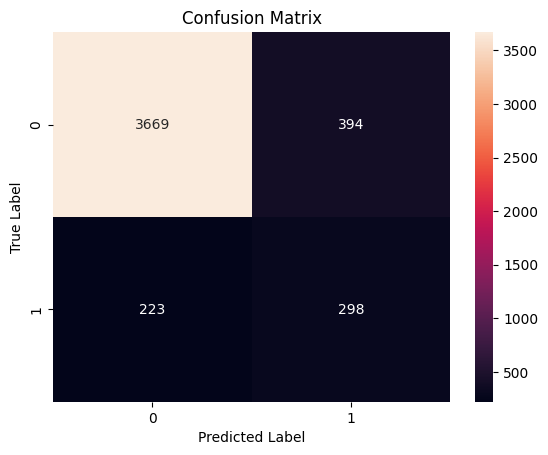

In [ ]:
# Menampilkan hasil evaluasi
print(f'Classification Report: \n{classification_report(y_test, y_pred_cat)}')

# Confusion Matrix
class_label = [0, 1]
ranfor = pd.DataFrame(confusion_matrix(y_test, y_pred_cat), index=class_label, columns=class_label)
sns.heatmap(ranfor, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_test, y_proba_cat)
print(f"AUC Score: {auc_score:.4f}")

AUC Score: 0.8002


AUC Score: 0.8002


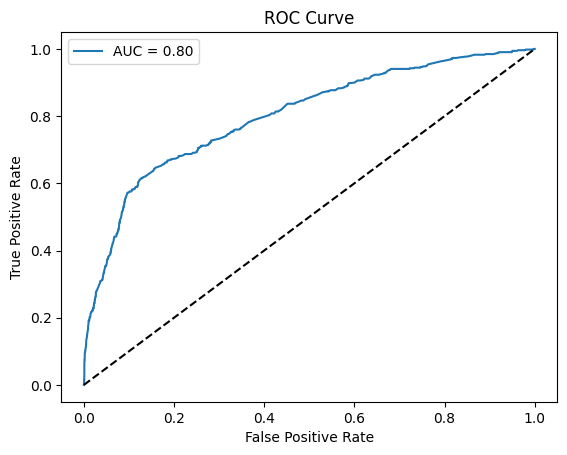

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_test, y_proba_cat)
print(f"AUC Score: {auc_score:.4f}")

fpr, tpr, _ = roc_curve(y_test, y_proba_cat)
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Garis acak
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Inisialisasi model dasar CatBoost
model_cat = CatBoostClassifier(
    silent=True,
    random_state=42
)

# Parameter grid
param_grid = {
    'iterations': [100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5],
    # 'class_weights': [[1.0, 1.0]]
}

# GridSearchCV untuk mencari kombinasi terbaik
grid_search = GridSearchCV(
    estimator=model_cat,
    param_grid=param_grid,
    scoring='roc_auc',  # AUC sebagai metrik evaluasi
    cv=3,  # 3-fold cross-validation
    n_jobs=-1,
    verbose=1
)

# Jalankan pencarian
grid_search.fit(X_train_res, y_train_res)

# Menampilkan parameter terbaik
print("Best Parameters:", grid_search.best_params_)

# Menampilkan skor terbaik
print("Best AUC Score:", grid_search.best_score_)

# Gunakan model terbaik untuk prediksi
best_cat_model = grid_search.best_estimator_
y_pred = best_cat_model.predict(X_test_selected)
y_proba = best_cat_model.predict_proba(X_test_selected)[:, 1]


Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best Parameters: {'depth': 8, 'iterations': 200, 'l2_leaf_reg': 1, 'learning_rate': 0.1}
Best AUC Score: 0.9724964499267346


Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      4063
           1       0.58      0.32      0.41       521

    accuracy                           0.90      4584
   macro avg       0.75      0.65      0.68      4584
weighted avg       0.88      0.90      0.88      4584



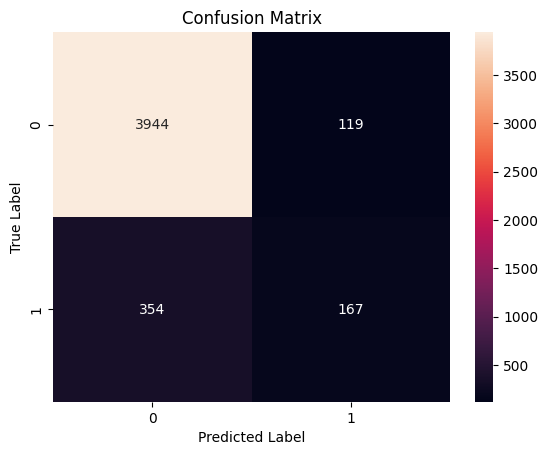

In [ ]:
# Menampilkan hasil evaluasi
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

# Confusion Matrix
class_label = [0, 1]
ranfor = pd.DataFrame(confusion_matrix(y_test, y_pred), index=class_label, columns=class_label)
sns.heatmap(ranfor, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_test, y_proba)
print(f"AUC Score: {auc_score:.4f}")

AUC Score: 0.7913


AUC Score: 0.7913


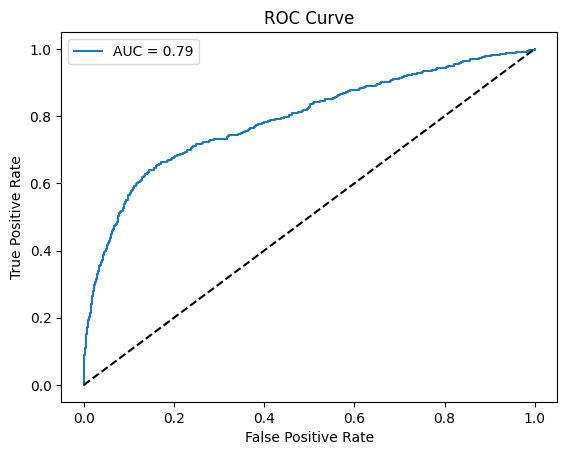

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_test, y_proba)
print(f"AUC Score: {auc_score:.4f}")

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Garis acak
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


# Import Dataset Validasi

In [ ]:
data_validasi = pd.read_csv('/content/drive/MyDrive/Dataset/validation_set.csv')
data_validasi

,customer_number,usia,pekerjaan,status_perkawinan,pendidikan,gagal_bayar_sebelumnya,pinjaman_rumah,pinjaman_pribadi,jenis_kontak,bulan_kontak_terakhir,...,jumlah_kontak_kampanye_ini,hari_sejak_kontak_sebelumnya,jumlah_kontak_sebelumnya,hasil_kampanye_sebelumnya,tingkat_variasi_pekerjaan,indeks_harga_konsumen,indeks_kepercayaan_konsumen,suku_bunga_euribor_3bln,jumlah_pekerja,pulau
0,445420,35,penyedia jasa,menikah,SMA,no,yes,yes,cellular,jul,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,Jawa
1,585604,52,teknisi,lajang,Diploma,unknown,no,no,telephone,may,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,Papua
2,888824,37,pekerja kasar,menikah,SMP,unknown,yes,no,telephone,may,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,Bali
3,816820,51,pengangguran,menikah,Diploma,no,no,no,telephone,may,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,Sumatera
4,542716,45,teknisi,cerai,SMA,no,yes,no,cellular,may,...,1,999,1,failure,-1.8,92.893,-46.2,1.327,5099.1,Sumatera
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5724,782072,51,pekerja kasar,menikah,Tidak Tamat SD,no,yes,no,telephone,jun,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,Kalimantan
5725,116371,30,pekerja kasar,menikah,SMP,no,yes,yes,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,Sulawesi
5726,773759,45,pekerja kasar,menikah,SMP,unknown,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,NTB
5727,612330,60,teknisi,menikah,Diploma,unknown,no,no,telephone,jul,...,15,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,Papua


In [ ]:
data_validasi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5729 entries, 0 to 5728
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_number               5729 non-null   int64  
 1   usia                          5729 non-null   int64  
 2   pekerjaan                     5729 non-null   object 
 3   status_perkawinan             5729 non-null   object 
 4   pendidikan                    5729 non-null   object 
 5   gagal_bayar_sebelumnya        5729 non-null   object 
 6   pinjaman_rumah                5729 non-null   object 
 7   pinjaman_pribadi              5729 non-null   object 
 8   jenis_kontak                  5729 non-null   object 
 9   bulan_kontak_terakhir         5729 non-null   object 
 10  hari_kontak_terakhir          5729 non-null   object 
 11  jumlah_kontak_kampanye_ini    5729 non-null   int64  
 12  hari_sejak_kontak_sebelumnya  5729 non-null   int64  
 13  jum

In [ ]:
data_validasi.isnull().sum()

In [ ]:
data_validasi.duplicated().sum()

## Feature Engineering

In [ ]:
data_validasi['bulan_kontak_terakhir'].unique()
#merubah nilai di kolom bulan_kontak_terakhir menjadi numerik
bulan_mapping={
    'mar':3,'apr':4,
    'may':5,'jun':6,
    'jul':7,'aug':8,
    'sep':9,'oct':10,
    'nov':11,'dec':12
}
data_validasi['bulan_kontak_terakhir']=data_validasi['bulan_kontak_terakhir'].map(bulan_mapping)
data_validasi['bulan_kontak_terakhir'].unique()

In [ ]:
data_validasi['hari_kontak_terakhir'].unique()

In [ ]:
#merubah nilai di kolom hari menjadi numerik
hari_maping={
    'mon':1,'tue':2,'wed':3,
    'thu':4,'fri':5
}
data_validasi['hari_kontak_terakhir']=data_validasi['hari_kontak_terakhir'].map(hari_maping)
data_validasi['hari_kontak_terakhir'].unique()

In [ ]:
data_validasi['pendidikan'].unique()

In [ ]:
##merubah nilai di kolom pendidikan menjadi numerik
pendidikan_maping={
    'unknown':1,'TIDAK SEKOLAH':2,'Tidak Tamat SD':3,
    'SD': 4,'SMP':5,'SMA':6, 'Diploma':7,
    'Pendidikan Tinggi':8
}
data_validasi['pendidikan']=data_validasi['pendidikan'].map(pendidikan_maping)
data_validasi['pendidikan'].value_counts()

In [ ]:
data_validasi.head()

In [ ]:
#label encoding kolom pekerjaan, status perkawinan, gagal bayar, pinjaman rumah,pinjaman pribadi,hasil kampanye dalam satu kali
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data_validasi['pekerjaan']=le.fit_transform(data_validasi['pekerjaan'])
data_validasi['status_perkawinan']=le.fit_transform(data_validasi['status_perkawinan'])
data_validasi['gagal_bayar_sebelumnya']=le.fit_transform(data_validasi['gagal_bayar_sebelumnya'])
data_validasi['pinjaman_rumah']=le.fit_transform(data_validasi['pinjaman_rumah'])
data_validasi['pinjaman_pribadi']=le.fit_transform(data_validasi['pinjaman_pribadi'])
data_validasi['hasil_kampanye_sebelumnya']=le.fit_transform(data_validasi['hasil_kampanye_sebelumnya'])
data_validasi['pulau']=le.fit_transform(data_validasi['pulau'])
data_validasi['jenis_kontak']=le.fit_transform(data_validasi['jenis_kontak'])
data_validasi.head()

## Memisahkan kolom customer number

In [ ]:
 customer_number=data_validasi['customer_number']
 customer_number

## Standarisasi Data

In [ ]:
# Standarisasi fitur numerik
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(data_validasi), columns=data_validasi.columns)

print(X_scaled)

In [ ]:
X_scaled.head()

In [ ]:
X_scaled.info()

## Pemilihan Atribut sesuai dengan data train yang digunakan untuk pembuatan model

In [ ]:
data_test = X_scaled[['jumlah_kontak_kampanye_ini',
 'hari_kontak_terakhir',
 'status_perkawinan',
 'jumlah_kontak_sebelumnya',
 'usia',
 'pinjaman_pribadi',
 'pinjaman_rumah',
 'customer_number',
 'pekerjaan',
 'hasil_kampanye_sebelumnya',
 'hari_sejak_kontak_sebelumnya',
 'tingkat_variasi_pekerjaan',
 'gagal_bayar_sebelumnya',
 'suku_bunga_euribor_3bln',
 'indeks_harga_konsumen']]

# Penggunaan Model Cat Boost

In [ ]:
prediction=model_cat.predict_proba(data_test)[:,1]
prediction

In [ ]:
threshold = 0.5
data_test['prediction_berlangganan_deposito'] = (prediction > threshold).astype(int)
data_test['berlangganan_deposito'] = prediction

display(data_test[['prediction_berlangganan_deposito', 'berlangganan_deposito']])

In [ ]:
data_test['prediction_berlangganan_deposito'].value_counts()

# Hasil Akhir

In [ ]:
nilai=pd.DataFrame({'customer_number':customer_number,'berlangganan_deposito':data_test['berlangganan_deposito']})
nilai


In [ ]:
nilai.to_csv('AnalytIQ_FInal.csv',index=False)